# Advertisement vs Sales Regression

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'D:\HH DATA SCIENCE\Advertising.csv', index_col=0)
#column index 0 can be used as the index for the data
#200 months of advertising
#The values are in thousands
#sales in number
#other columns in dollars (in thousands)

In [2]:
print(type(df))
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
(200, 4)


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


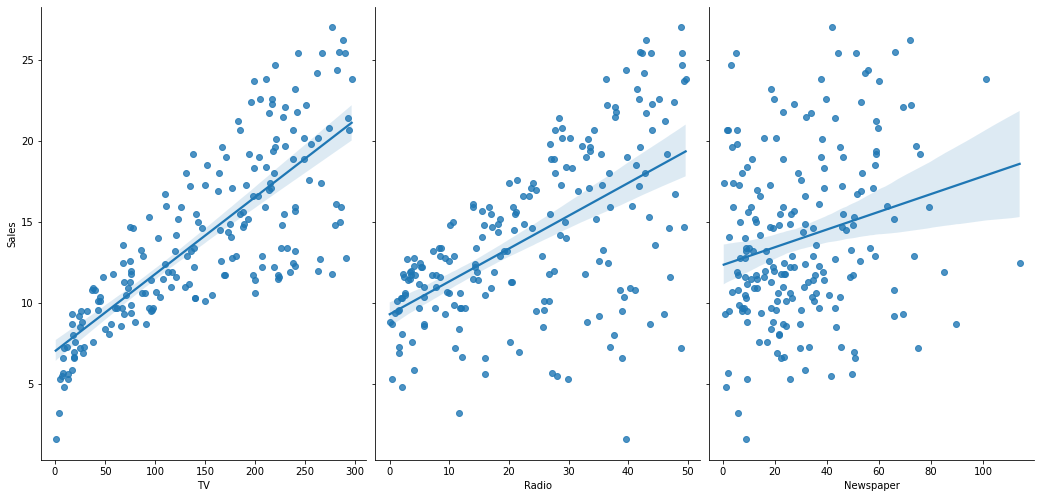

In [9]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars=['Sales'], height=7, aspect= 0.7, kind='reg')
#kind='reg' : what kind of regression is possible with each of the x variable with the y variable

In [14]:
feature_cols=['TV','Radio', 'Newspaper']
X= df[feature_cols]
print(X.head())
X.shape



      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


(200, 3)

In [17]:
y=df['Sales'] #or y=df.Sales
print(y.head())
y.shape
type(y)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64


pandas.core.series.Series

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.2)
#20% of data for test
print("X Train: ",X_train.shape)
print("X Test: ",X_test.shape)
print("y Train: ",y_train.shape)

X Train:  (160, 3)
X Test:  (40, 3)
y Train:  (160,)


## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
print ("intercept = ",linreg.intercept_)#beta 0
print (linreg.coef_) #beta (1,2,3)


intercept =  2.9079470208164295
[0.0468431  0.17854434 0.00258619]


In [26]:
#To pair feature name with coefficients

list(zip(feature_cols, linreg.coef_))

[('TV', 0.04684310317699043),
 ('Radio', 0.17854434380887607),
 ('Newspaper', 0.0025861860939890013)]

In [33]:
y_pred = linreg.predict(X_test)

y_pred.shape

print(y_pred)

[21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


In [53]:
from sklearn import metrics
import numpy as np

print("Mean absolute error = ", metrics.mean_absolute_error(y_test, y_pred))

print("Mean squared error = ", metrics.mean_squared_error(y_test, y_pred))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Root Mean Square error = ", RMSE)

print("Accuracy in % = " , 100-RMSE)


Mean absolute error =  1.040215401292472
Mean squared error =  1.9918855518287906
Root Mean Square error =  1.4113417558581587
Accuracy in % =  98.58865824414184


## KNN REGRESSOR

In [52]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor (n_neighbors=5)

knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)


RMSE_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr))
print("RMSE KNN Regressor = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr)))
print("Accuracy in % = " , 100-RMSE_KNN)

#Hence KNN has bigger error





RMSE KNN Regressor =  1.6062814199261601
Accuracy in % =  98.39371858007384


# Predicting using a new value

In [54]:
new_data = pd.DataFrame([[95,280,5],[20,80,0]])

y_pred_linreg_new = linreg.predict(new_data)

print("Sales =",y_pred_linreg_new )


Sales = [57.36338902 18.12835659]
